# Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
file_path = r"C:\Users\bbuser\Downloads\laptopData.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [28]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


<Axes: title={'center': 'Laptops by Company'}, xlabel='Company'>

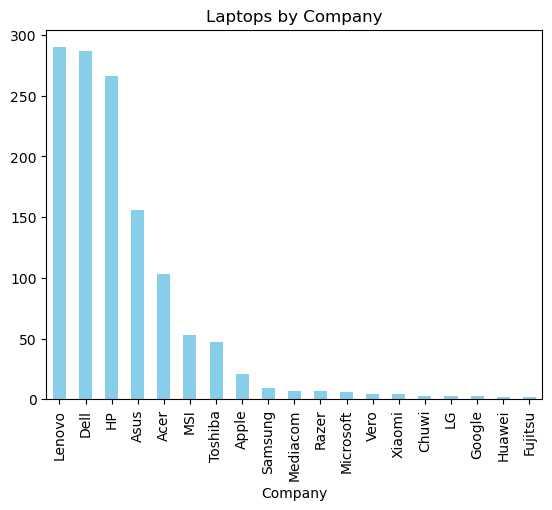

In [29]:
#1. Laptops by Company:
df['Company'].value_counts().plot.bar(color='skyblue', title='Laptops by Company')

<Axes: title={'center': 'Types of Laptops'}, xlabel='TypeName'>

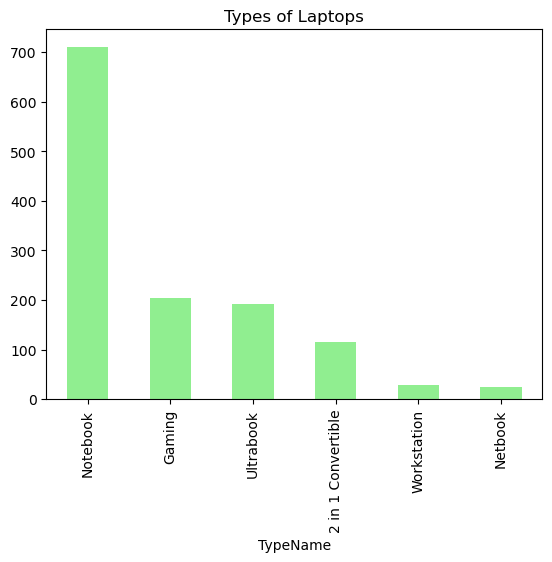

In [31]:
# 2. Laptop Types:
df['TypeName'].value_counts().plot.bar(color='lightgreen', title='Types of Laptops')


<Axes: title={'center': 'RAM Distribution'}, xlabel='Ram'>

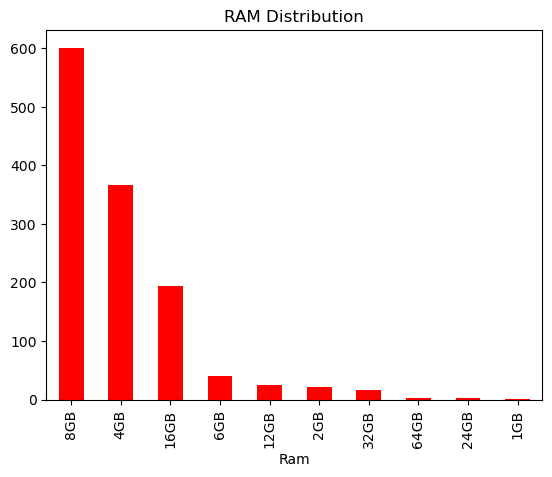

In [33]:
#3. RAM Distribution:
df['Ram'].value_counts().plot.bar(color='red', title='RAM Distribution')


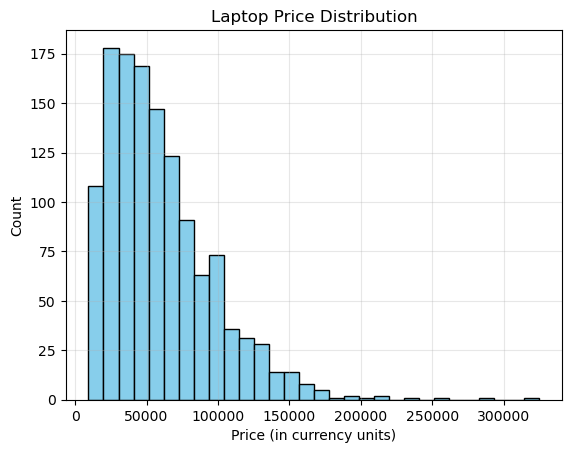

In [34]:
import matplotlib.pyplot as plt

df['Price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Laptop Price Distribution')
plt.xlabel('Price (in currency units)')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

In [35]:
df.columns=df.columns.str.strip() #strip it remove spaces from left to right 

In [36]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

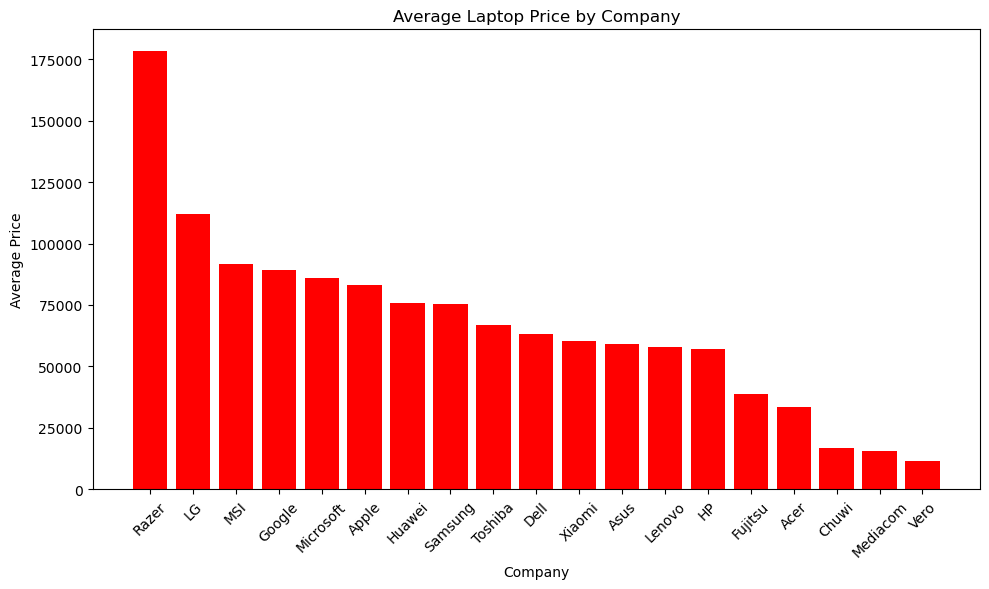

In [40]:
# Example 1: Average Price by Company
avg_price_by_company = df.groupby('Company')['Price'].mean().reset_index()
avg_price_by_company = avg_price_by_company.sort_values(by='Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_company['Company'], avg_price_by_company['Price'], color='red')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


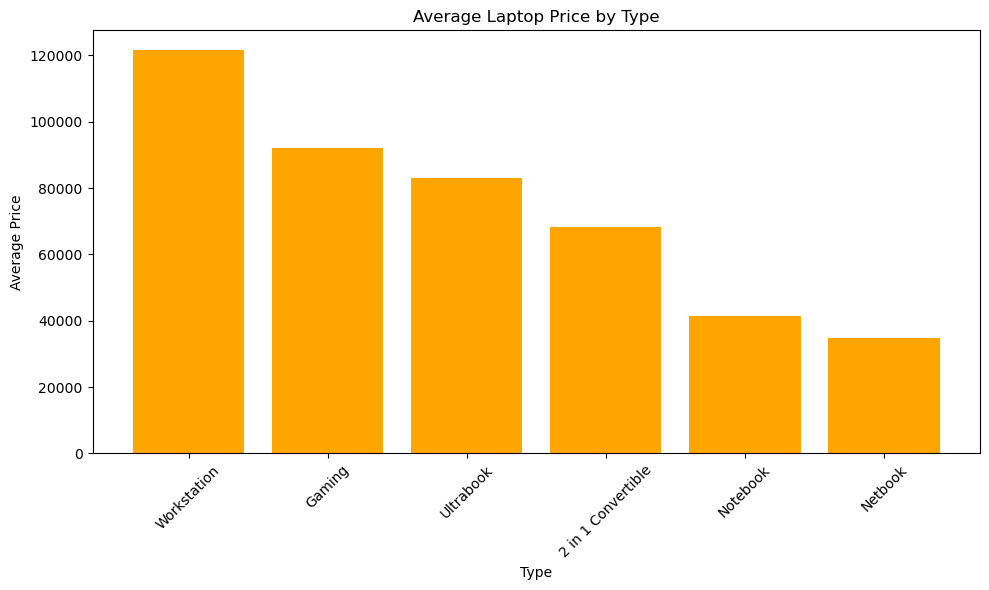

In [41]:
# Example 2: Average Price by TypeName

avg_price_by_type = df.groupby('TypeName')['Price'].mean().reset_index()
avg_price_by_type = avg_price_by_type.sort_values(by='Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_type['TypeName'], avg_price_by_type['Price'], color='orange')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


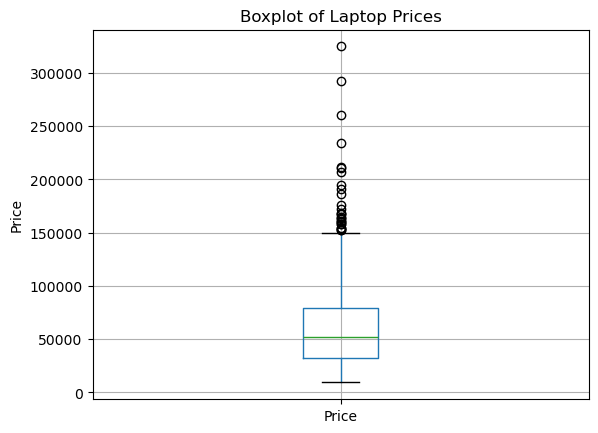

In [42]:
df.boxplot(column=['Price'])
plt.title('Boxplot of Laptop Prices')
plt.ylabel('Price')
plt.show()


In [56]:
df['Price'].describe()


count      1273.000000
mean      59955.814073
std       37332.251005
min        9270.720000
25%       31914.720000
50%       52161.120000
75%       79333.387200
max      324954.720000
Name: Price, dtype: float64

In [58]:
#'Price' is not an integer:

non_integer_prices = df[~df['Price'].apply(float.is_integer)]
print(non_integer_prices[['Company', 'Price']].head())


  Company        Price
0   Apple   71378.6832
1   Apple   47895.5232
3   Apple  135195.3360
4   Apple   96095.8080
6   Apple  114017.6016


In [59]:
df.isnull().sum()

Unnamed: 0            30
Company               30
TypeName              30
Inches                30
ScreenResolution      30
Cpu                   30
Ram                   30
Memory                30
Gpu                   30
OpSys                 30
Weight                30
Price                 30
Unit_Cost           1302
dtype: int64

# Data Cleaning

In [60]:
avg_price_by_company = df.groupby('Company')['Price'].mean()
print(avg_price_by_company)


Company
Acer          33394.615969
Apple         83340.499886
Asus          58972.373723
Chuwi         16745.726400
Dell          63237.061079
Fujitsu       38574.720000
Google        89386.080000
HP            57214.371465
Huawei        75870.720000
LG           111834.720000
Lenovo        58072.477208
MSI           91814.548891
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       66747.370213
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64


In [61]:
# Example value for missing_unit_cost
missing_unit_cost = 500.00

# Assign to new column
df.loc[4, 'Unit_Cost'] = missing_unit_cost

# View result
print(df[['Company', 'Price', 'Unit_Cost']].head(10))


  Company        Price  Unit_Cost
0   Apple   71378.6832        NaN
1   Apple   47895.5232        NaN
2      HP   30636.0000        NaN
3   Apple  135195.3360        NaN
4   Apple   96095.8080      500.0
5    Acer   21312.0000        NaN
6   Apple  114017.6016        NaN
7   Apple   61735.5360        NaN
8    Asus   79653.6000        NaN
9    Acer   41025.6000        NaN


In [63]:
df[df['Unit_Cost']==0]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Unit_Cost


In [65]:
#Values Are in 'Unit_Cost'

print(df['Unit_Cost'].unique())


[ nan 500.]


In [69]:
df.loc[8, 'Unit_Cost'] = missing_unit_cost
df.head(9)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Unit_Cost
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,NaN
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,NaN
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,NaN
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,500.0
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,NaN
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016,NaN
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,NaN
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000,500.0


In [70]:
print(df.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Unit_Cost'],
      dtype='object')


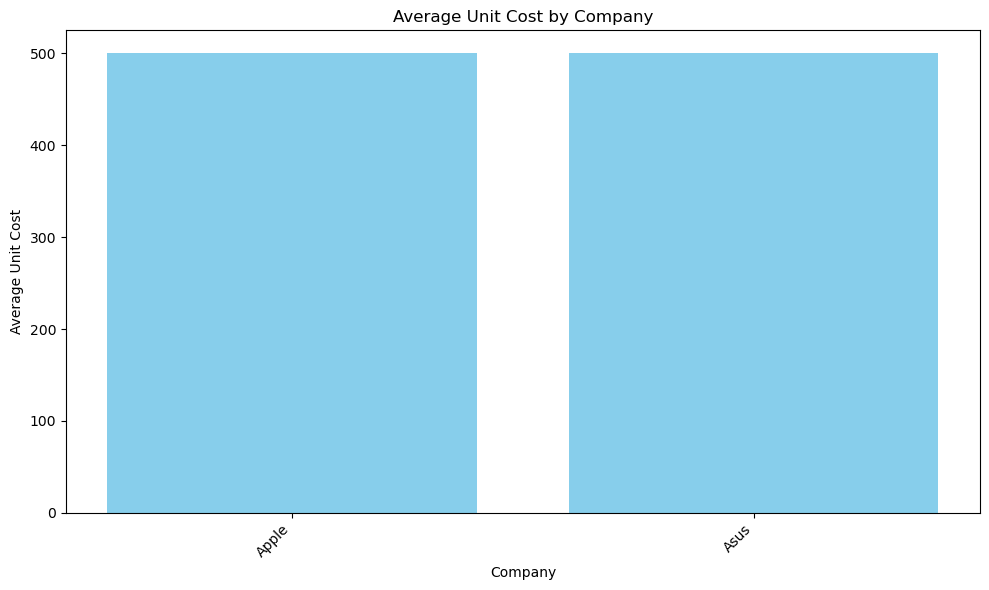

In [73]:
# Group by 'Company' and calculate average Unit_Cost
average_unit_cost = df.groupby('Company')['Unit_Cost'].mean().reset_index()

# Sort by Unit_Cost descending
average_unit_cost = average_unit_cost.sort_values(by='Unit_Cost', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(average_unit_cost['Company'], average_unit_cost['Unit_Cost'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Average Unit Cost')
plt.title('Average Unit Cost by Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

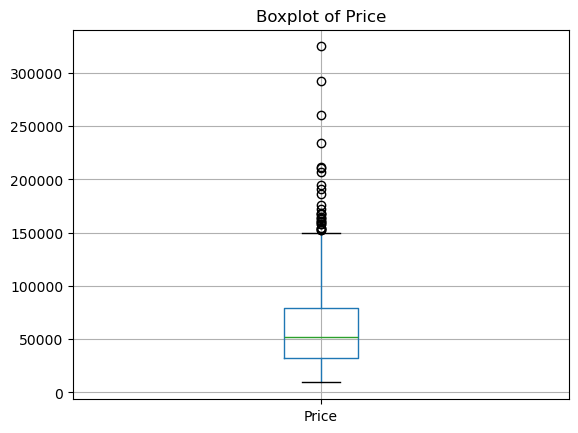

In [75]:
df.boxplot(column=['Price'])
plt.title('Boxplot of Price')
plt.show()

In [80]:
df['Unit_Cost'].describe()

count      2.0
mean     500.0
std        0.0
min      500.0
25%      500.0
50%      500.0
75%      500.0
max      500.0
Name: Unit_Cost, dtype: float64

In [81]:
# Show missing values count
print(df.isnull().sum())

# Fill missing Price values with mean Price
df['Price'] = df['Price'].fillna(df['Price'].mean())


Unnamed: 0            30
Company               30
TypeName              30
Inches                30
ScreenResolution      30
Cpu                   30
Ram                   30
Memory                30
Gpu                   30
OpSys                 30
Weight                30
Price                  0
Unit_Cost           1301
dtype: int64


In [82]:
unique_company_names = df['Company'].unique()
print(unique_company_names)


['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [83]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Unit_Cost
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,NaN
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,NaN
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,NaN
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,NaN
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,NaN
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,NaN
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,NaN
